In [1]:
import pandas as pd
birddata = pd.read_csv("bird_tracking.csv")
birddata.info

<bound method DataFrame.info of        Unnamed: 0  altitude               date_time  device_info_serial  \
0               0        71  2013-08-15 00:18:08+00                 851   
1               1        68  2013-08-15 00:48:07+00                 851   
2               2        68  2013-08-15 01:17:58+00                 851   
3               3        73  2013-08-15 01:47:51+00                 851   
4               4        69  2013-08-15 02:17:42+00                 851   
...           ...       ...                     ...                 ...   
61915       61915        11  2014-04-30 22:00:08+00                 833   
61916       61916         6  2014-04-30 22:29:57+00                 833   
61917       61917         5  2014-04-30 22:59:52+00                 833   
61918       61918        16  2014-04-30 23:29:43+00                 833   
61919       61919         9  2014-04-30 23:59:34+00                 833   

        direction   latitude  longitude  speed_2d bird_name  
0    

In [2]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


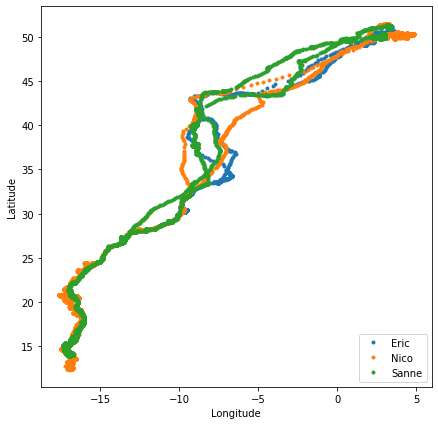

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
birddata=pd.read_csv("bird_tracking.csv")

birddata.info()

bird_names=pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for birdname in bird_names:
    ix=birddata.bird_name == birdname
    x,y=birddata.longitude[ix] , birddata.latitude[ix]
    plt.plot(x,y,'.',label=birdname)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

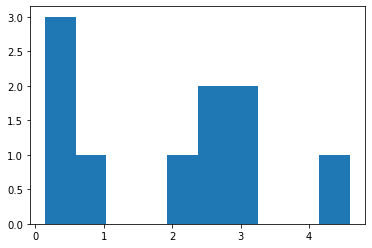

In [11]:
ix=birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed[:10])


In [15]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [16]:
np.isnan(speed).any()

True

In [17]:
np.sum(np.isnan(speed))

85

In [19]:
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [20]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

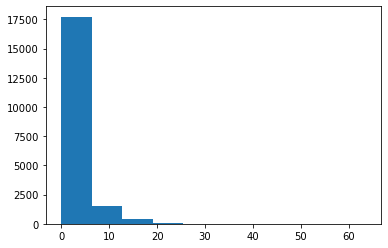

In [21]:
ix=birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

AttributeError: 'Rectangle' object has no property 'normed'

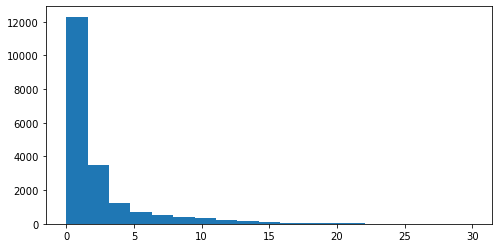

In [25]:
plt.figure(figsize=(8,4))
ix=birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]

ind=np.isnan(speed)

plt.hist(speed[~ind],bins=np.linspace(0,30,20),normed=True) 
plt.axis('tight')
plt.xlabel('2D speed(m/s)')
plt.ylabel('Frequency');
plt.savefig("hist_bird.pdf")

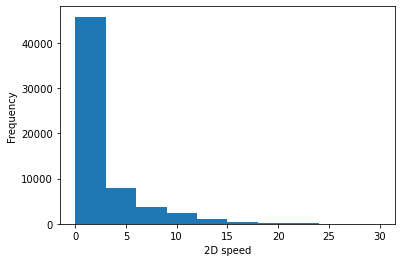

<Figure size 432x288 with 0 Axes>

In [26]:
birddata.speed_2d.plot(kind='hist',range=[0,30])
plt.xlabel('2D speed')
plt.show()
plt.savefig('pd_hist.pdf')

In [27]:
birddata.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [28]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [29]:
import datetime
datetime.datetime.today()

datetime.datetime(2020, 9, 16, 22, 30, 24, 780630)

In [32]:
time_1 = datetime.datetime.today()
time_2 = datetime.datetime.today()
time_2 - time_1

datetime.timedelta(0)

In [33]:
date_str = birddata.date_time[0]
type(date_str)

str

In [34]:
date_str[:-3]

'2013-08-15 00:18:08'

In [37]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [38]:
timestamps=[]
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time[k][:-3],"%Y-%m-%d %H:%M:%S"))


In [39]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [40]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

In [41]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [42]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [43]:
times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time=[time-times[0] for time in times]

In [44]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [45]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [46]:
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [47]:
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

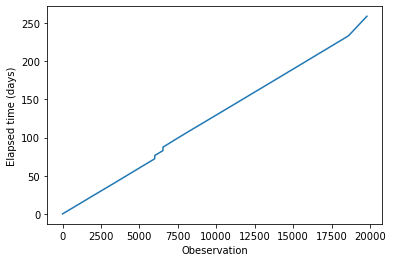

In [50]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time=[time-times[0] for time in times]
elapsed_days=np.array(elapsed_time)/datetime.timedelta(days=1)

plt.plot(elapsed_days)
plt.xlabel("Obeservation")
plt.ylabel("Elapsed time (days)");
plt.savefig('timeplot.pdf')